In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MultiLabelBinarizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
!pip install -q kaggle
from google.colab  import files
files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


{'IMDb Movies India.csv': b'Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3\r\n ,,,Drama,,,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia\r\n#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid\r\n#Homecoming,(2021),90 min,"Drama, Musical",,,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana\r\n#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor\r\n...And Once Again,(2010),105 min,Drama,,,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali\r\n...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor\r\n...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma\r\n.in for Motion,(2008),59 min,Documentary,,,Anirban Datta,,,\r\n?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Da

In [3]:
!mkdir -p -/. kaggle
!cp kaggle.json-/kaggle/
!chmod 600 -/.kaggle/kaggle.json
!kaggle datasets download adrianmcmahon/imdb-india-movies
!unzip IMDb Movies India

mkdir: invalid option -- '/'
Try 'mkdir --help' for more information.
cp: missing destination file operand after 'kaggle.json-/kaggle/'
Try 'cp --help' for more information.
chmod: invalid option -- '/'
Try 'chmod --help' for more information.
Dataset URL: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies
License(s): CC0-1.0
100% 494k/494k [00:00<00:00, 792kB/s]
100% 494k/494k [00:00<00:00, 792kB/s]
unzip:  cannot find or open IMDb, IMDb.zip or IMDb.ZIP.


In [4]:
file_path='IMDb Movies India.csv'
import pandas as pd
data=pd.read_csv(file_path,encoding='latin-1')
print(data)
print(data)

                                     Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes            Director           A

In [5]:
print(data.shape)
print(data.head())
print(data.info())

(15509, 10)
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Ka

In [6]:
print(data.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [7]:
features=['Genre','Duration','Director','Actor 1','Actor 2','Actor 3']
target=['Rating']

In [10]:
data=data.dropna(subset = features + target)

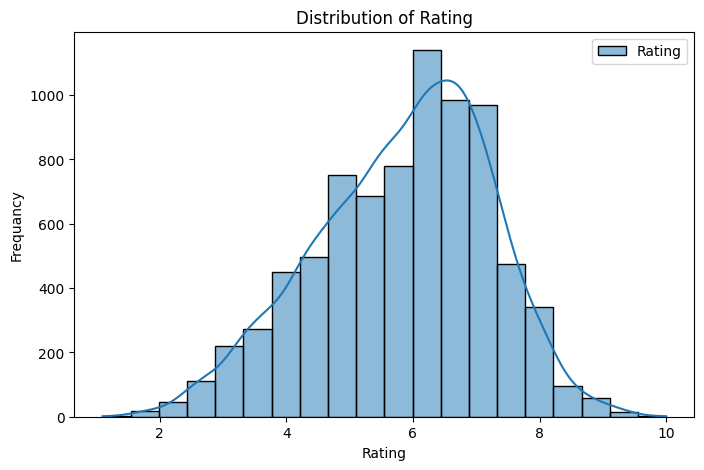

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data[target], bins=20, kde=True, color='blue')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequancy')
plt.show()

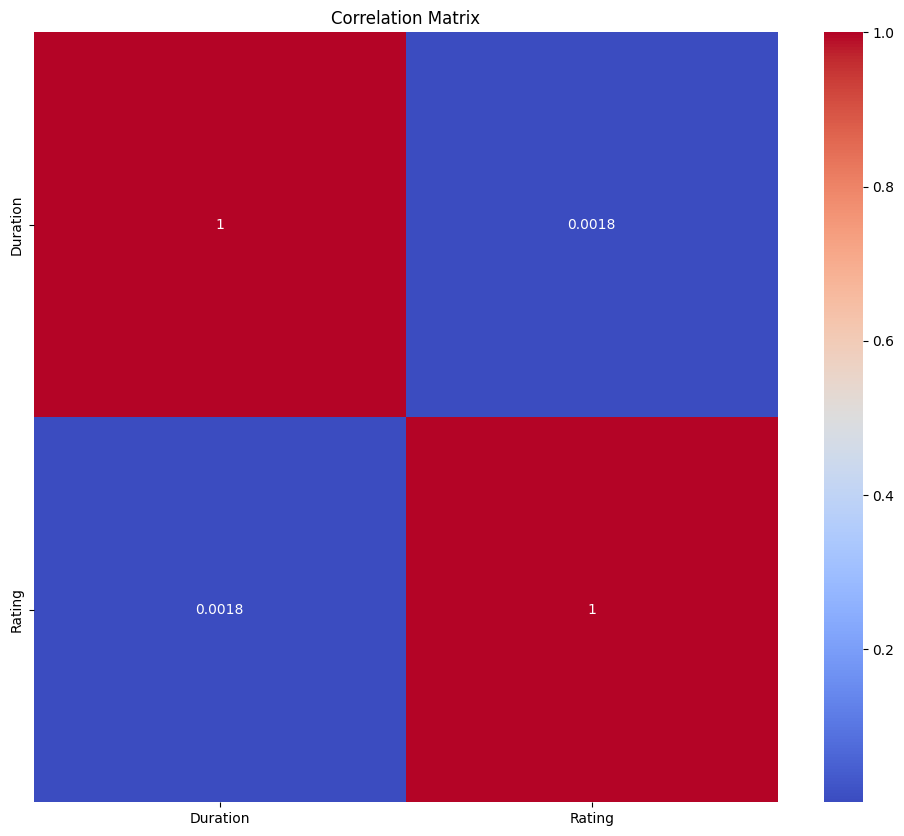

In [35]:
plt.figure(figsize=(12, 10))
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

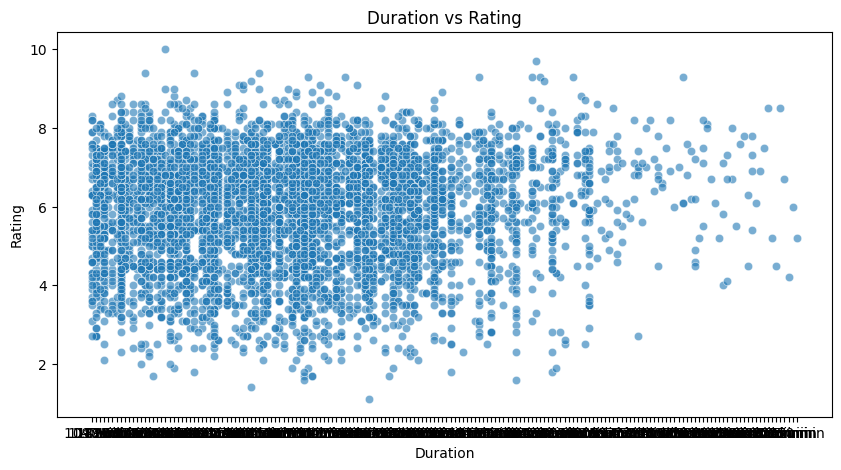

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = data['Duration'], y = data['Rating'] , alpha=0.6)
plt.title('Duration vs Rating')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.show()

<ipython-input-12-7c378ffb5a31>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= Top_Genre.index , y=Top_Genre.values, palette='viridis')


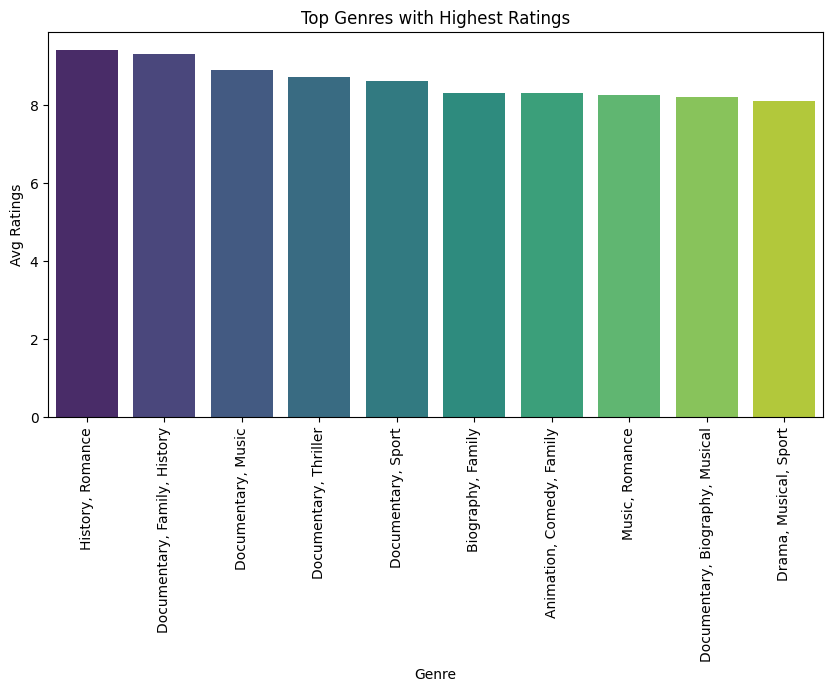

In [12]:
plt.figure(figsize= (10,5))
Top_Genre= data.groupby('Genre')['Rating'].mean().sort_values(ascending=False)[:10]
sns.barplot(x= Top_Genre.index , y=Top_Genre.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top Genres with Highest Ratings')
plt.ylabel('Avg Ratings')
plt.show()

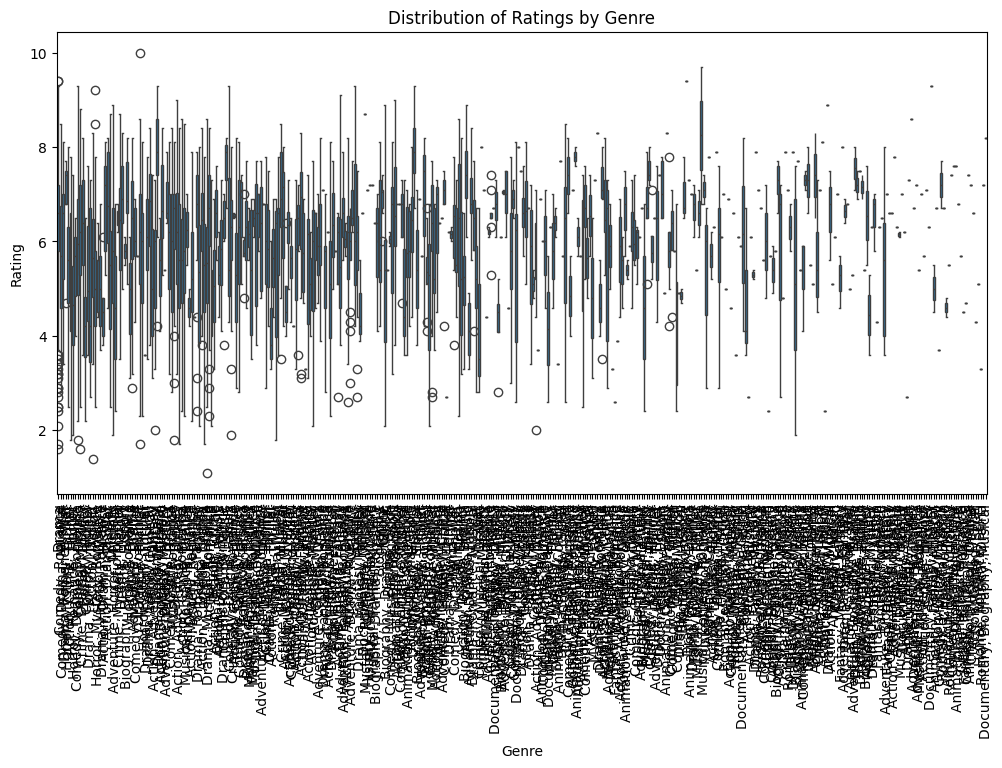

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Ratings by Genre')
plt.show()

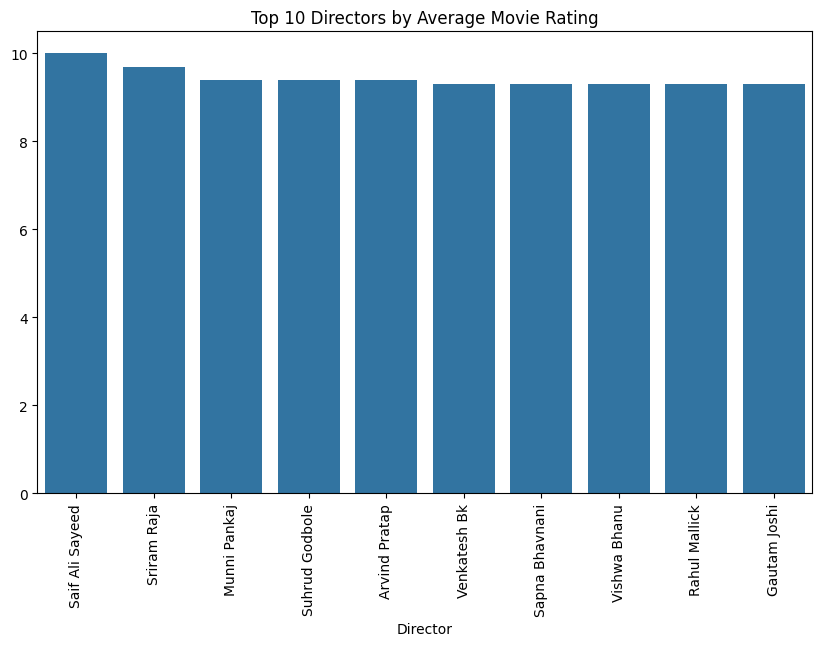

In [39]:
top_directors = data.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xticks(rotation=90)
plt.title('Top 10 Directors by Average Movie Rating')
plt.show()

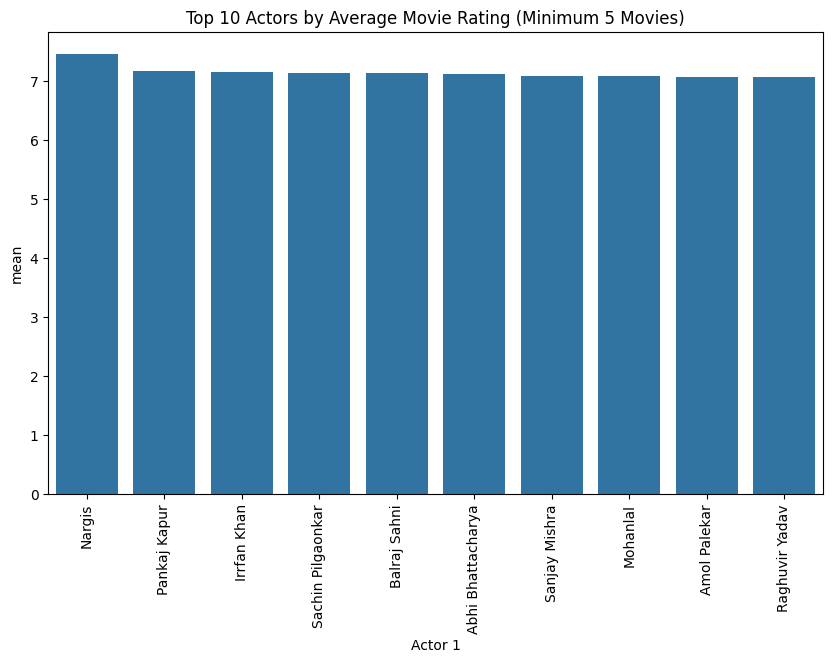

In [40]:
actor_ratings = data.groupby('Actor 1')['Rating'].agg(['mean', 'count'])
actor_ratings = actor_ratings[actor_ratings['count'] >= 5]  # Filter actors with at least 5 movies
actor_ratings = actor_ratings.sort_values(by='mean', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=actor_ratings.index, y=actor_ratings['mean'])
plt.xticks(rotation=90)
plt.title('Top 10 Actors by Average Movie Rating (Minimum 5 Movies)')
plt.show()

In [13]:
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False)
encoded_gen_dir = encoder.fit_transform(data[['Genre','Director']])
encoded_gen_dir_data = pd.DataFrame(encoded_gen_dir, columns = encoder.get_feature_names_out(['Genre', 'Director']))

In [14]:
data['Actors'] = data[['Actor 1', 'Actor 2', 'Actor 3']].values.tolist()
mlb= MultiLabelBinarizer()
Actor_encoded = pd.DataFrame(mlb.fit_transform(data['Actors']),columns = mlb.classes_)

In [15]:
data_final= pd.concat([data[['Duration','Rating']],encoded_gen_dir_data,Actor_encoded],axis=1)

In [16]:
x=data_final.drop('Rating',axis=1)
y=data_final['Rating']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
data['Duration'] = data['Duration'].astype(str).str.replace(' min', '')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
data['Duration'].fillna(data['Duration'].mean(), inplace=True)
data_final = pd.concat([data[['Duration','Rating']],encoded_gen_dir_data,Actor_encoded],axis=1)
x = data_final.drop('Rating',axis=1)
y = data_final['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<ipython-input-18-5b6172fb7645>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Duration'].fillna(data['Duration'].mean(), inplace=True)


In [20]:
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [19]:
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1))
y_imputed = y_imputed.ravel()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y_imputed, test_size=0.2, random_state=42)

In [22]:

data_final = pd.concat([data[['Duration','Rating']], encoded_gen_dir_data, Actor_encoded], axis=1)

imputer = SimpleImputer(strategy='mean')
data_final_imputed = pd.DataFrame(imputer.fit_transform(data_final), columns=data_final.columns) # Impute missing values using SimpleImputer

x = data_final_imputed.drop('Rating', axis=1)
y = data_final_imputed['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
ridge_model=Ridge(random_state=42)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_ridge_model = grid_search.best_estimator_

In [24]:
y_pred = best_ridge_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Interpret coefficients (optional)
print(pd.DataFrame({'Feature': x_train.columns, 'Coefficient': best_ridge_model.coef_}))

RMSE: 1.10
R-squared: 0.00
                                 Feature  Coefficient
0                               Duration     0.000327
1                           Genre_Action    -0.016382
2                Genre_Action, Adventure     0.019698
3     Genre_Action, Adventure, Biography    -0.000508
4        Genre_Action, Adventure, Comedy     0.003719
...                                  ...          ...
7844                          Zoya Afroz    -0.004883
7845                        Zoya Hussain    -0.041989
7846                             Zubeida    -0.000031
7847                       Zuber K. Khan    -0.002789
7848                         Zulfi Sayed    -0.000114

[7849 rows x 2 columns]


In [28]:
coefficents = best_ridge_model.coef_
importances_df = pd.DataFrame({'Feature': x.columns, 'Importance': np.abs(coefficents)})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)

                    Feature    Importance
3720           Bipasha Basu  1.107725e-01
6681            Sanjay Dutt  9.546661e-02
2894      Abhishek Bachchan  9.423791e-02
6814           Shabana Azmi  7.966634e-02
680    Director_Ashu Trikha  7.844140e-02
...                     ...           ...
3848                 Chutki  2.167401e-07
4790          Kaustav Ghosh  2.167401e-07
6150            Rajesh Kava  2.167401e-07
4637          Julie Tejwani  2.167401e-07
506   Director_Akshay Shere  4.060461e-08

[7849 rows x 2 columns]


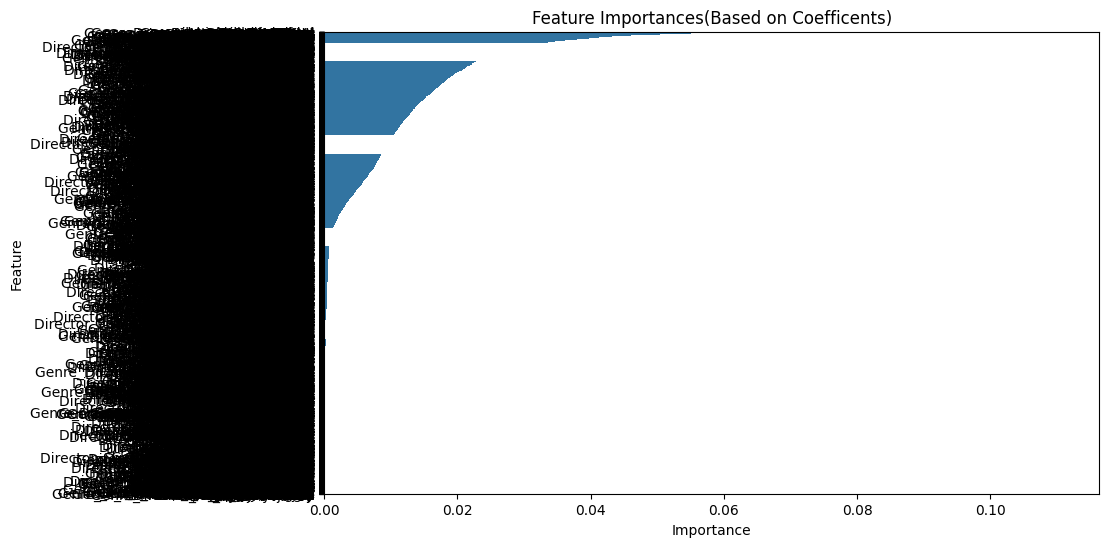

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances(Based on Coefficents)')
plt.show()

In [30]:
print("\nPredictions:")
print(y_pred)


Predictions:
[5.93538177 5.90670101 5.87919516 ... 5.89720494 5.89687749 5.89884219]


In [31]:
y_test.fillna(y_train.mean(), inplace=True)
y_pred = np.nan_to_num(y_pred)

In [32]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared \Error:{rmse: .2f}")

Root Mean Squared \Error: 1.10


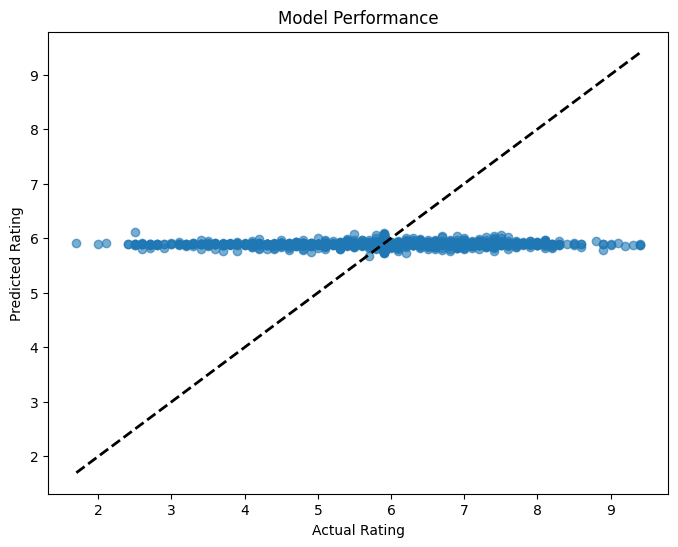

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Model Performance')
plt.show()

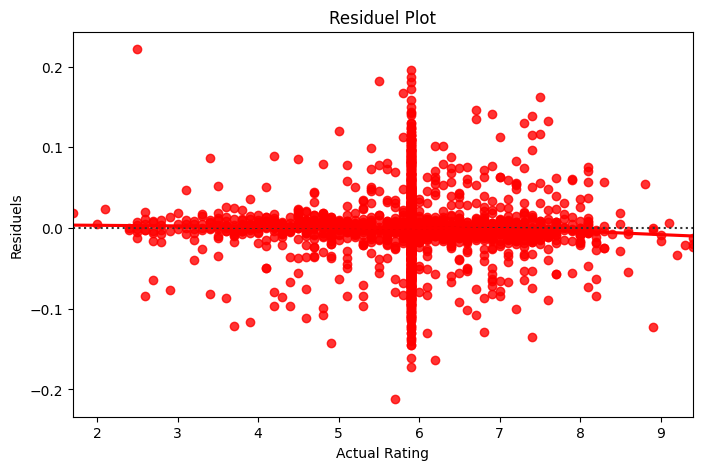

In [33]:
plt.figure(figsize=(8,5))
sns.residplot(x= y_test, y= y_pred,lowess=True,color='red')
plt.title('Residuel Plot')
plt.xlabel('Actual Rating')
plt.ylabel('Residuels')
plt.show()



1.   **Genre Preferences: Audience preferences play a significant role in movie ratings, with certain genres consistently receiving higher average ratings. This suggests that viewers have distinct tastes and gravitate towards specific types of movies**

2.   **Director-Genre Expertise: Certain directors might excel in specific genres, demonstrating a deep understanding of the genre's conventions and audience expectations.**

3.   **The presence of popular and acclaimed actors significantly influences movie ratings. Their star power and ability to attract audiences can significantly impact a film's box office success and critical reception.**

4.   **Duration: The relationship between movie duration and rating might be complex and not necessarily linear. There could be an optimal duration range for movies that tend to receive higher ratings**

5. **Practical Applications: The insights gained from this project can be applied in various ways, such as recommending movies to users based on their preferences, predicting the box office success of upcoming movies, and guiding filmmakers in understanding audience tastes.**





